# [In Class] Homework #1
This problem set deals with matrial from the first four lectures.  
You may reference any materials, but make sure if you directly copy code, that you provide a link to the source in the mark up.
Likewise, if you find a really helpful website, you should add that link as well.

Work from this notebook and submit a copy of this notebook via canvas.  Include any additional scripts or files needed to reproduce

## Problem 1.  
* Load the Pitt_Cathedral.jpg file from the Data folder as a color image
* Convert the image colors to display using the imshow() command 
* then Convert the image to Grayscale and display again

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

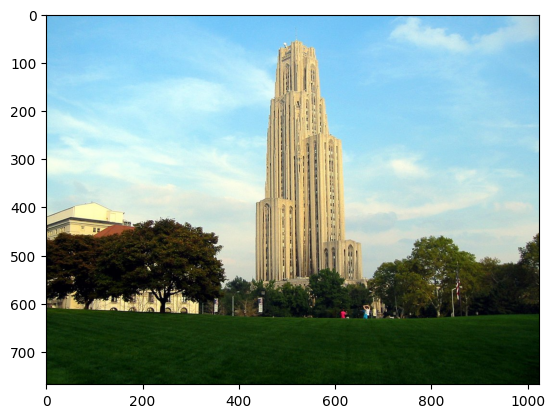

In [36]:
# load cathedral and display in color
cathy = cv2.imread('Data/Pitt_Cathedral.jpg')
cathy_rgb = cv2.cvtColor(cathy, cv2.COLOR_BGR2RGB)
plt.imshow(cathy_rgb)

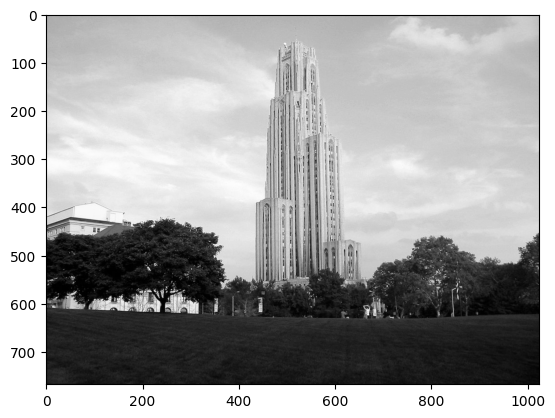

In [37]:
# convert image to grayscale and display
cathy_gray = cv2.cvtColor(cathy, cv2.COLOR_BGR2GRAY)
plt.imshow(cathy_gray, cmap='gray')

## Problem 2.
* Annotate the Cathedral image from problem 1 with the slogan "Hail to Pitt" placed in the image
* In a different font and color, add your name in text to the same image
* Crop the image around the Cathedral and display 

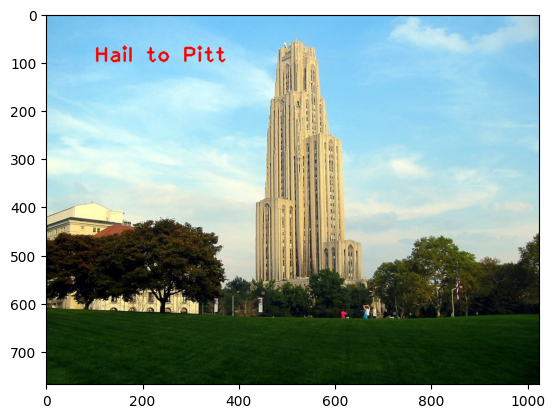

In [38]:
# annonate H2P
slogan = "Hail to Pitt"
cathy_text = cathy_rgb.copy()
cv2.putText(cathy_text, slogan, (100, 100), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 3)
plt.imshow(cathy_text)

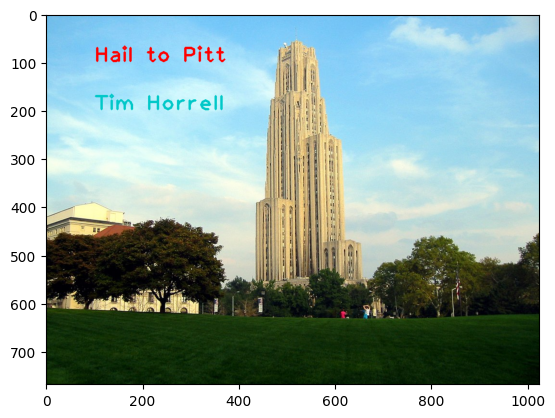

In [39]:
# add my name in a different color
name = "Tim Horrell"
cv2.putText(cathy_text, name, (100, 200), cv2.FONT_HERSHEY_PLAIN, 3, (0, 200, 200), 3)
plt.imshow(cathy_text)

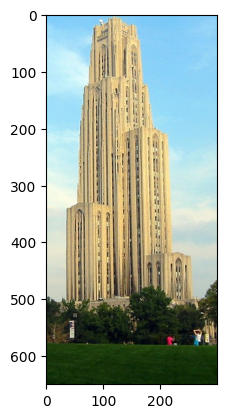

In [40]:
# crop around Cathy
cathy_crop = cathy_rgb[50:700, 400:700]
plt.imshow(cathy_crop)

## Problem 3.
* Create a binary mask seperating the blue sky by thresholding
* Using this mask, change (just the) sky to be a deeper blue 

Text(0.5, 1.0, 'Threshold')

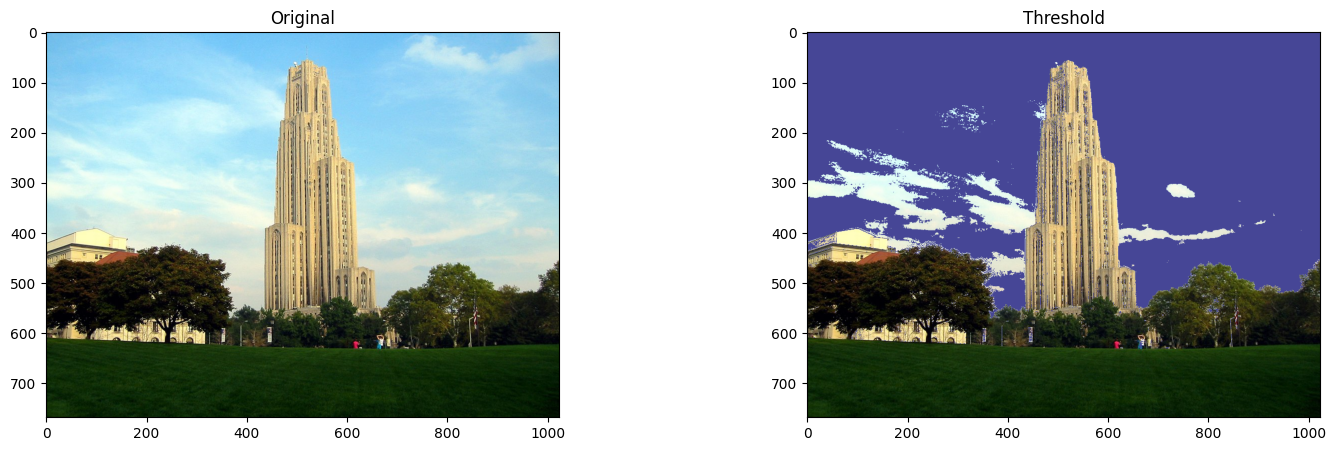

In [41]:
# use binary mask for thresholding
mask = (cathy[:,:,0] > 150) & (cathy[:,:,1] < 250) & (cathy[:,:,2] < 225)

# make a copy of cathy BGR and change masked bits
cathy_mask = cathy.copy()
cathy_mask[mask] = [150, 70, 70]
cathy_mask_rgb = cv2.cvtColor(cathy_mask, cv2.COLOR_BGR2RGB)

# show images
plt.figure(figsize=[18, 5])
plt.subplot(121); plt.imshow(cathy_rgb); plt.title("Original")
plt.subplot(122); plt.imshow(cathy_mask_rgb); plt.title("Threshold")

## Problem 4.
[ECE 1390]
* Write a function to preform a median filter operation using a moving 3 x 3 kernel.  The median filter should compute the median value from the 9 pixels in the kernel and replace the value at the center.    

[ECE 2390]
* Write a function to preform a median filter operation using an arbitrary kernel (taken as a second argument).  The median filter should compute the median value from the pixels in the kernel and replace the value at the kernel anchor (center).    



In [42]:
print(cathy.shape)

(768, 1024, 3)


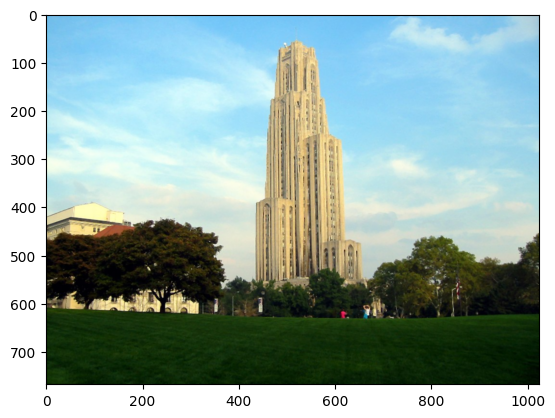

In [44]:
# function to implement median filter
def median_filter(gray_image):
    # copy image and get shape
    output_image = gray_image.copy()
    row = gray_image.shape[0]
    column = gray_image.shape[1]

    # hold filter values
    value_list = np.zeros(9)

    # loop through all pixels
    for r in range(1, row-1):
        for c in range(1, column-1):
            for val in range(3):

                # store pixel color intensities in all spots around image
                value_list[0] = (gray_image[r-1, c-1, val])
                value_list[1] = (gray_image[r,   c-1, val])
                value_list[2] = (gray_image[r+1, c-1, val])
                value_list[3] = (gray_image[r-1, c,   val])
                value_list[4] = (gray_image[r,   c,   val])
                value_list[5] = (gray_image[r+1, c,   val])
                value_list[6] = (gray_image[r-1, c+1, val])
                value_list[7] = (gray_image[r,   c+1, val])
                value_list[8] = (gray_image[r+1, c+1, val])

                # find median value and replace in output image
                med_value = np.median(value_list)
                output_image[r, c, val] = med_value

    return output_image

cathy_filter = median_filter(cathy)
cathy_filter_rgb = cv2.cvtColor(cathy_filter, cv2.COLOR_BGR2RGB)
plt.imshow(cathy_filter_rgb)